<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from utilities import pmfplot

## 10.6 Poisson Distribution

### Plot the discrete distribution 

[Text(0.5, 0, 'random variable $X$'), Text(0, 0.5, 'CDF $F(x)$'), (-0.02, 1.1)]

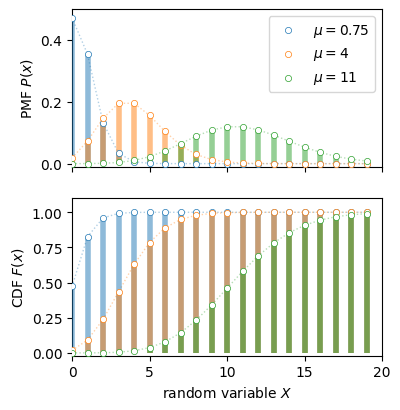

In [2]:
xlim = (0, 20)
ylim = (-0.01, 0.5)

kws = [
    {'mu': 0.75, 'k': 0.5, 'color': 'C0', 'ls': '-'},
    {'mu': 4, 'k': 0.5, 'color': 'C1', 'ls': '-'},
    {'mu': 11, 'k': 0.8, 'color': 'C2', 'ls': '-'},
]
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))

x = np.arange(0, 20)
for d in kws:
    mu, k = d['mu'], d['k']
    #x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu)+1 )   
    pmfplot(ax[0], x, stats.poisson.pmf(x, mu), c=d['color'], label=r'$\mu={}$'.format(mu))
    pmfplot(ax[1], x, stats.poisson.cdf(x, mu), c=d['color'])
    
    ax[0].plot(x, stats.poisson.pmf(x, mu), c=d['color'], lw=1, ls=':', alpha=0.35)
    ax[1].plot(x, stats.poisson.cdf(x, mu), c=d['color'], lw=1, ls=':', alpha=0.35)
    
ax[0].legend()
ax[0].set(xlabel=r"", ylabel=r"PMF $P(x)$",     ylim=ylim, xlim=xlim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(x)$",  ylim=[-0.02, 1.1])   

### Draw Samples from the Distribution

In [3]:
rng = np.random.default_rng()

n_samples = 100
mu = 4
sample = rng.poisson(mu, n_samples)
sample

array([7, 4, 3, 4, 4, 4, 2, 4, 2, 3, 5, 4, 6, 6, 2, 1, 7, 4, 8, 5, 8, 4,
       3, 4, 1, 4, 3, 6, 1, 2, 4, 1, 4, 3, 4, 5, 3, 4, 6, 4, 6, 3, 3, 6,
       4, 6, 2, 5, 4, 7, 5, 4, 3, 6, 4, 1, 4, 3, 3, 4, 2, 6, 0, 6, 6, 4,
       3, 6, 6, 5, 3, 2, 3, 7, 4, 2, 6, 4, 3, 8, 2, 7, 3, 5, 3, 5, 2, 2,
       3, 3, 3, 2, 5, 5, 3, 5, 2, 4, 3, 1])

Now show the distribution of these samples -- they roughly approximate the "true" distribution of the population shown above:

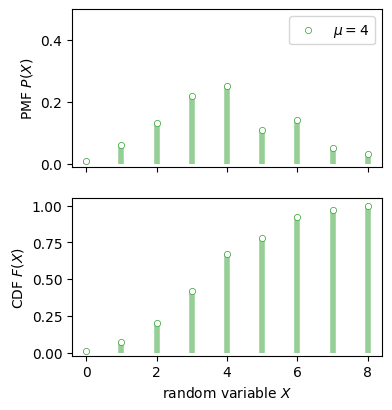

In [6]:
# Count the number of events
x = np.arange(0, sample.max() + 1)
counts = np.zeros_like(x, dtype=int)
for idx in sample:
    counts[idx] += 1

# compute pdf and cdf
pmf = counts / counts.sum()
cdf = pmf.cumsum()


fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
pmfplot(ax[0], x, pmf, c='C2', label=r'$\mu={}$'.format(mu))
pmfplot(ax[1], x, cdf, c='C2')
ax[0].set(xlabel=r"", ylabel=r"PMF $P(X)$", ylim=ylim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(X)$", ylim=[-0.02, 1.05])    
ax[0].legend();